<a href="https://colab.research.google.com/github/Askoye/IP-Core/blob/master/Python_Notebook_Solution_Moringa_Data_Science_Core_W2_Ted_Askoye_Independent_Project_2020_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis: Univariate Analysis
1. Defining the Question

a) Specifying the Data Analytic Question

Finding out the state of Financial inclusion in Kenya, Rwanda, Tanzania and Uganda between 2016-2018



b) Defining the Metric for Success

1.   Which individuals have access to banking services
2.   Finding out the number of banks within each region
3.   Finding out the sex, age, level of education 





In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset files :

Variable Definitions: http://bit.ly/VariableDefinitions 

Dataset: http://bit.ly/FinancialDataset  

In [118]:
dataset_df = pd.read_csv('http://bit.ly/FinancialDataset')
var_def_df = pd.read_csv('http://bit.ly/VariableDefinitions')


Determining the number of records

In [119]:
dataset_df.shape
print('This dataset has ' + str(dataset_df.shape[0]) + ' rows, and ' + str(dataset_df.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [120]:
var_def_df.shape
print('This dataset has ' + str(var_def_df.shape[0]) + ' rows, and ' + str(var_def_df.shape[1]) + ' columns')

This dataset has 12 rows, and 2 columns


Previewing our data

In [121]:
print(dataset_df)
print('xxx'*30)
print(var_def_df.head())
print('xxx'*30)
print(dataset_df.info())
print('xxx'*30)


      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

In [122]:
# Converting Year to String
dataset_df['year'] = dataset_df['year'].astype(str)


In [123]:
# Preview our data after conversion

print(dataset_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  object 
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.3+ MB
None


In [124]:
print(dataset_df.describe())

       household_size  Respondent Age
count    23496.000000    23490.000000
mean         3.681818       38.804300
std          2.279933       16.519996
min          0.000000       16.000000
25%          2.000000       26.000000
50%          3.000000       35.000000
75%          5.000000       49.000000
max         21.000000      100.000000


Validation


In [125]:
year2016 = dataset_df['year'] == '2016'
print(dataset_df[year2016])

      country  year  ...  Level of Educuation           Type of Job
6068   Rwanda  2016  ...  Secondary education  Remittance Dependent
6069   Rwanda  2016  ...  Secondary education         Self employed
6070   Rwanda  2016  ...  No formal education   Farming and Fishing
6071   Rwanda  2016  ...   Tertiary education   Informally employed
6072   Rwanda  2016  ...    Primary education   Informally employed
...       ...   ...  ...                  ...                   ...
14798  Rwanda  2016  ...    Primary education   Farming and Fishing
14799  Rwanda  2016  ...  No formal education  Remittance Dependent
14800  Rwanda  2016  ...    Primary education   Farming and Fishing
14801  Rwanda  2016  ...    Primary education   Informally employed
14802  Rwanda  2016  ...  No formal education   Farming and Fishing

[8734 rows x 13 columns]


Tidying up

1. Checking for Outliers

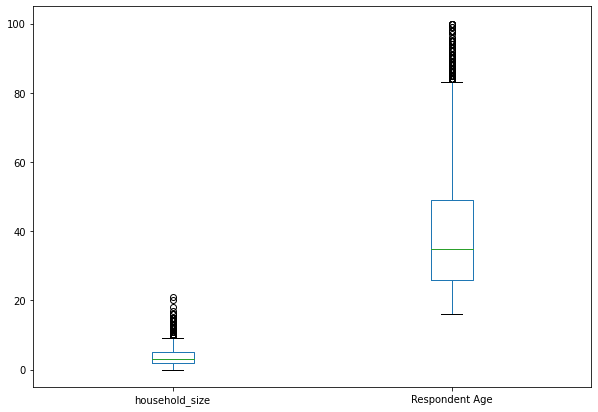

In [126]:
dataset_df.boxplot(grid = False, figsize=(10, 7))

Checking for Anomalies


In [127]:
dataset_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Identifying missing data

In [128]:
dataset_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

We will not deal with the missing values of data as they represent information that is vital

More data cleaning procedures

In [129]:
Q1 = dataset_df.quantile(0.25)
Q3 = dataset_df.quantile(0.75)
IQR = Q3 - Q1
dataset_df_out = dataset_df[~((dataset_df < (Q1 - 1.5 * IQR)) | (dataset_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset_df)
print(dataset_df_out)

      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

Ploting the univariate summaries and recording our observations

In [130]:
print("Year 2016 - Year 2017")
print(dataset_df_out.describe())
print("Year 2017 - Year 2018")
print(dataset_df.describe())

Year 2016 - Year 2017
       household_size  Respondent Age
count    22879.000000    22873.000000
mean         3.573495       38.343549
std          2.079714       15.803965
min          0.000000       16.000000
25%          2.000000       26.000000
50%          3.000000       35.000000
75%          5.000000       48.000000
max          9.000000       83.000000
Year 2017 - Year 2018
       household_size  Respondent Age
count    23496.000000    23490.000000
mean         3.681818       38.804300
std          2.279933       16.519996
min          0.000000       16.000000
25%          2.000000       26.000000
50%          3.000000       35.000000
75%          5.000000       49.000000
max         21.000000      100.000000


Ploting the bivariate summaries and recording our observations

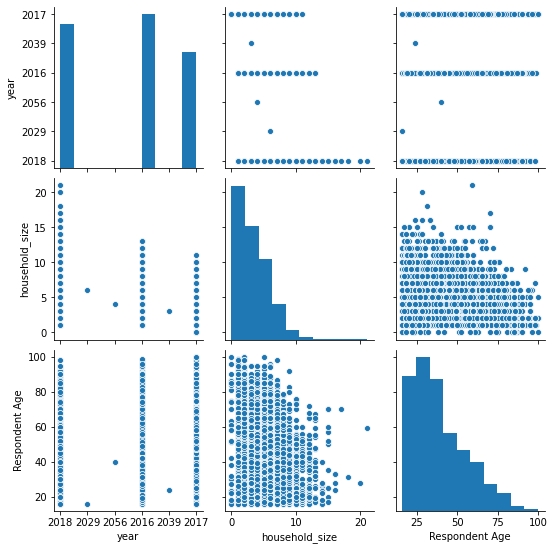

In [131]:
sns.pairplot(dataset_df)
plt.show()